### Glass Classification 

### Objective
- In this project I wil examine the following data set for Glass Materials and their element content.
- I will also explore the high and low content elements separately and their effect in the refractive index. 
- The second objective will be to use a ML model to classify the materials.  

#### Import libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from ucimlrepo import fetch_ucirepo

# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# metadata 
print(glass_identification.metadata) 
  
# variable information 
print(glass_identification.variables)

{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [22]:
display(y.info())
display(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Type_of_glass  214 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


None

Type_of_glass
2                76
1                70
7                29
3                17
5                13
6                 9
Name: count, dtype: int64

#### EDA Analysis

In [ ]:
# Explore the X variales in the dataframe
display(X.describe())
display(y.describe())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


,Type_of_glass
count,214.000000
mean,2.780374
std,2.103739
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,7.000000


- No missing values are present in the data set. 
- Most of the features are normally distributed exept for the Barium content. 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


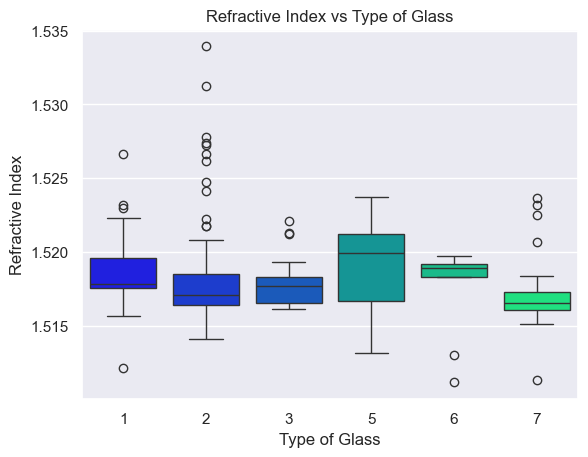

In [5]:
# Concatenate the features and the labels
glass_df = pd.concat([X, y], axis = 1)
display(glass_df.head())

# Visualize the Type of glass and RI
sns.set_theme(style="darkgrid", palette="winter")
sns.boxplot(glass_df, x = "Type_of_glass", y = "RI", hue = "Type_of_glass", palette="winter")
plt.title("Refractive Index vs Type of Glass")
plt.xlabel("Type of Glass")
plt.ylabel("Refractive Index")
plt.legend().set_visible(False)
plt.show()
plt.close()

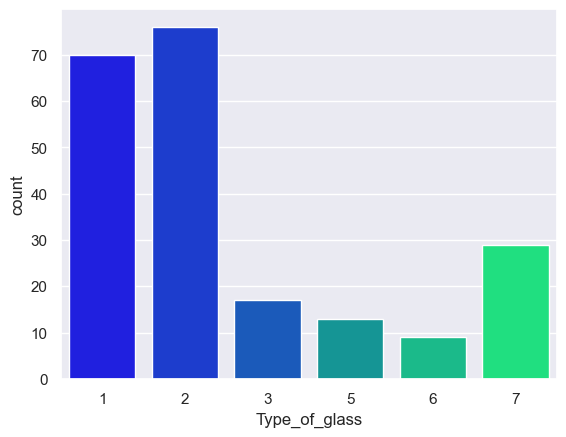

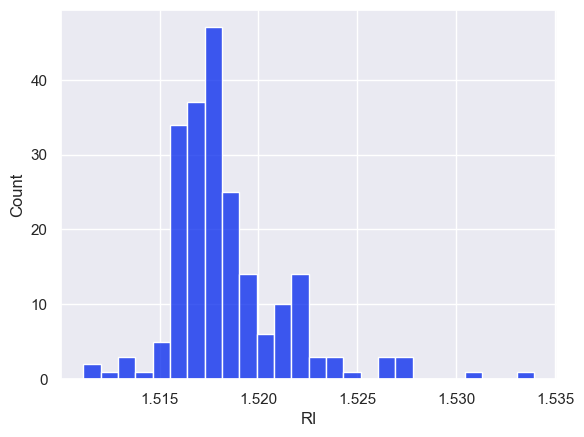

In [6]:
# Count observations in each Type of Glass
sns.countplot(glass_df, x = "Type_of_glass", hue = "Type_of_glass", palette="winter")
plt.legend().set_visible(False)
plt.show()
plt.close()

# Histogram of RI 
sns.histplot(glass_df, x = "RI")
plt.show()
plt.close()

- It can oberved that the groups 1 and 2 have more observations than the other groups. Additionally, there is no group 4 in the dataset
- The refractive index is normally distributed with some skewing to the right, most of the ouliers are observed in the group 2.
- The refractive index range is small enough to not be able to divide in "low" and "high" index.
- The data set contains labels from 1 to  7 which are not explained. I will create new labels based on the following classification:
  1. 1.49 < RI <= 1.515: Acrylic Glass
  2. 1.515 < RI <= 1.52: Crown Glass
  3. RI > 1.52: Flint Glass

#### Create new classification labels

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,GlassType_RI
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,Flint Glass
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,Crown Glass
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,Acrylic Glass
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,Crown Glass
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,Crown Glass


GlassType_RI
Crown Glass      124
Acrylic Glass     46
Flint Glass       44
Name: count, dtype: int64

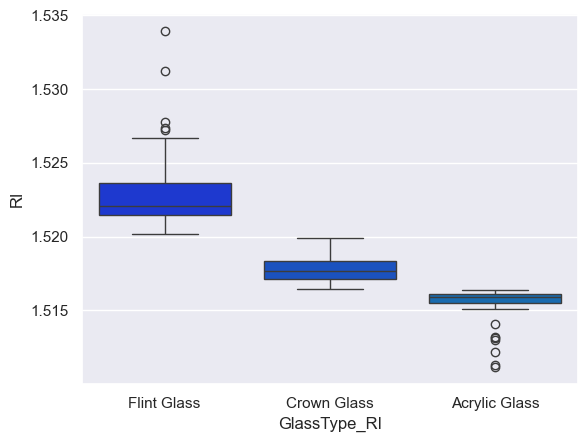

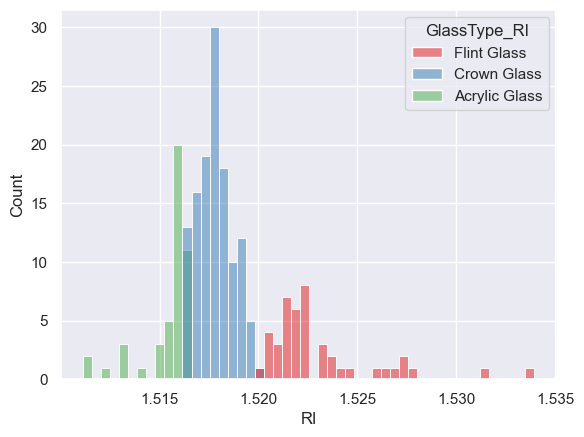

In [7]:
# Create a new classifcation for type of glass based on the RI using lambda function
glass_df["GlassType_RI"] = glass_df["RI"].apply(lambda x: "Acrylic Glass" 
                                                if 1.49 < x <= 1.51640
                                                 else "Crown Glass" 
                                                 if 1.51640 < x < 1.52 
                                                 else "Flint Glass")

display(glass_df.head())
display(glass_df["GlassType_RI"].value_counts())

#Visualize the new grouping 
sns.boxplot(glass_df, x = "GlassType_RI", y = "RI", hue = "GlassType_RI")
plt.show()
plt.close()

# Histogram of RI divided by new groups
sns.histplot(glass_df, x = "RI", hue = "GlassType_RI", alpha = 0.5, palette="Set1", bins = 50)
plt.show()
plt.close()

,GlassType_RI,Type_of_glass,RI
0,Acrylic Glass,1,1.515260
1,Acrylic Glass,2,1.515933
2,Acrylic Glass,3,1.516100
3,Acrylic Glass,5,1.513837
4,Acrylic Glass,6,1.512070
5,Acrylic Glass,7,1.515471
6,Crown Glass,1,1.517980
7,Crown Glass,2,1.517553
8,Crown Glass,3,1.517383
9,Crown Glass,5,1.518860


GlassType_RI,Acrylic Glass,Crown Glass,Flint Glass
Type_of_glass,,,
1,1.515260,1.517980,1.522231
2,1.515933,1.517553,1.525111
3,1.516100,1.517383,1.521530
5,1.513837,1.518860,1.521518
6,1.512070,1.518994,NaN
7,1.515471,1.517111,1.522480


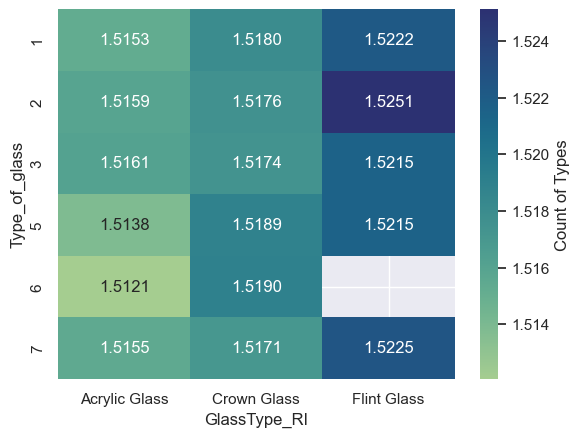

In [8]:
# Group variables in a new data frame with mean RI values
grouped_df = pd.DataFrame(glass_df.groupby(["GlassType_RI", "Type_of_glass"])["RI"].mean().reset_index())
display(grouped_df)

# Create a crosstab with the grouped variables
glass_df_crosstab = pd.crosstab (grouped_df["Type_of_glass"], grouped_df["GlassType_RI"], values=grouped_df["RI"], aggfunc = "mean") 
display(glass_df_crosstab)
sns.heatmap(glass_df_crosstab, annot=True, cbar_kws={"label": "Count of Types"}, cmap='crest', fmt='.4f')
plt.show()
plt.close()

#### Separate the dataset between high and low content elements

,RI,Na,Mg,Si,Type_of_glass,GlassType_RI
0,1.52101,13.64,4.49,71.78,1,Flint Glass
1,1.51761,13.89,3.60,72.73,1,Crown Glass
2,1.51618,13.53,3.55,72.99,1,Acrylic Glass
3,1.51766,13.21,3.69,72.61,1,Crown Glass
4,1.51742,13.27,3.62,73.08,1,Crown Glass


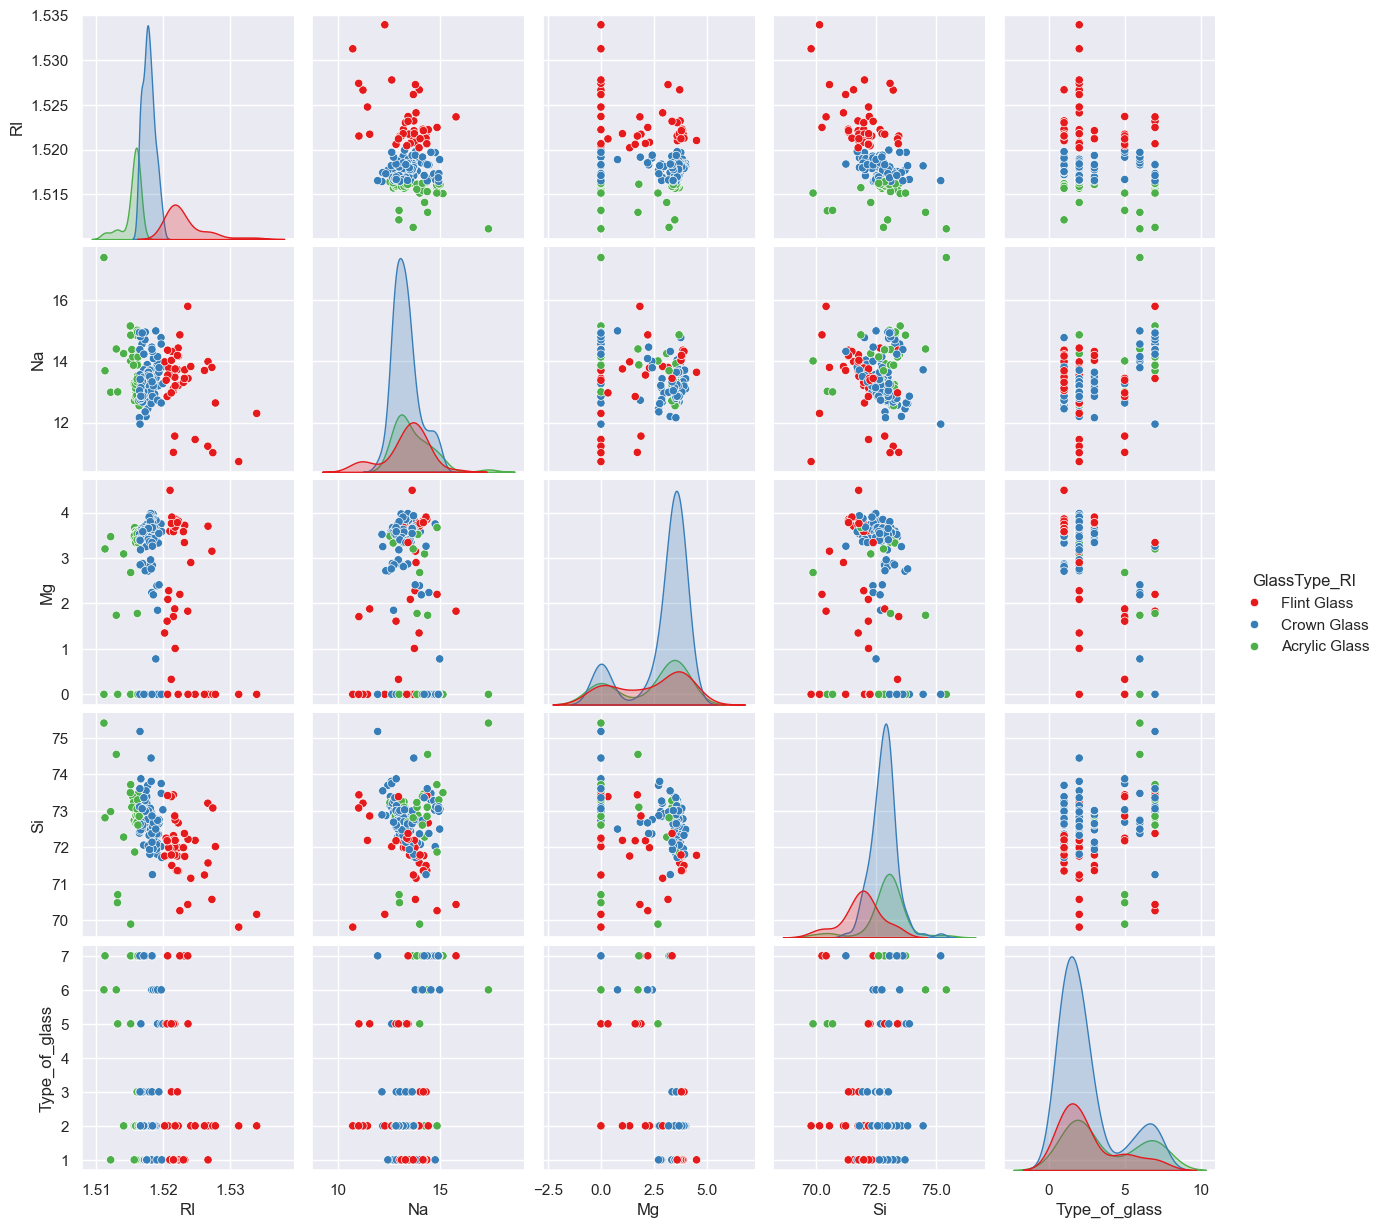

In [9]:
df_high_elmenents = glass_df.drop(columns=["Al", "K", "Ca", "Ba", "Fe"])
display(df_high_elmenents.head())

sns.pairplot(df_high_elmenents, hue = "GlassType_RI", palette="Set1")
plt.show()
plt.close()

- It is hard to observe a direct relationship between types of glass and high content elements.

,RI,Al,K,Ca,Ba,Fe,Type_of_glass,GlassType_RI
0,1.52101,1.10,0.06,8.75,0.0,0.0,1,Flint Glass
1,1.51761,1.36,0.48,7.83,0.0,0.0,1,Crown Glass
2,1.51618,1.54,0.39,7.78,0.0,0.0,1,Acrylic Glass
3,1.51766,1.29,0.57,8.22,0.0,0.0,1,Crown Glass
4,1.51742,1.24,0.55,8.07,0.0,0.0,1,Crown Glass


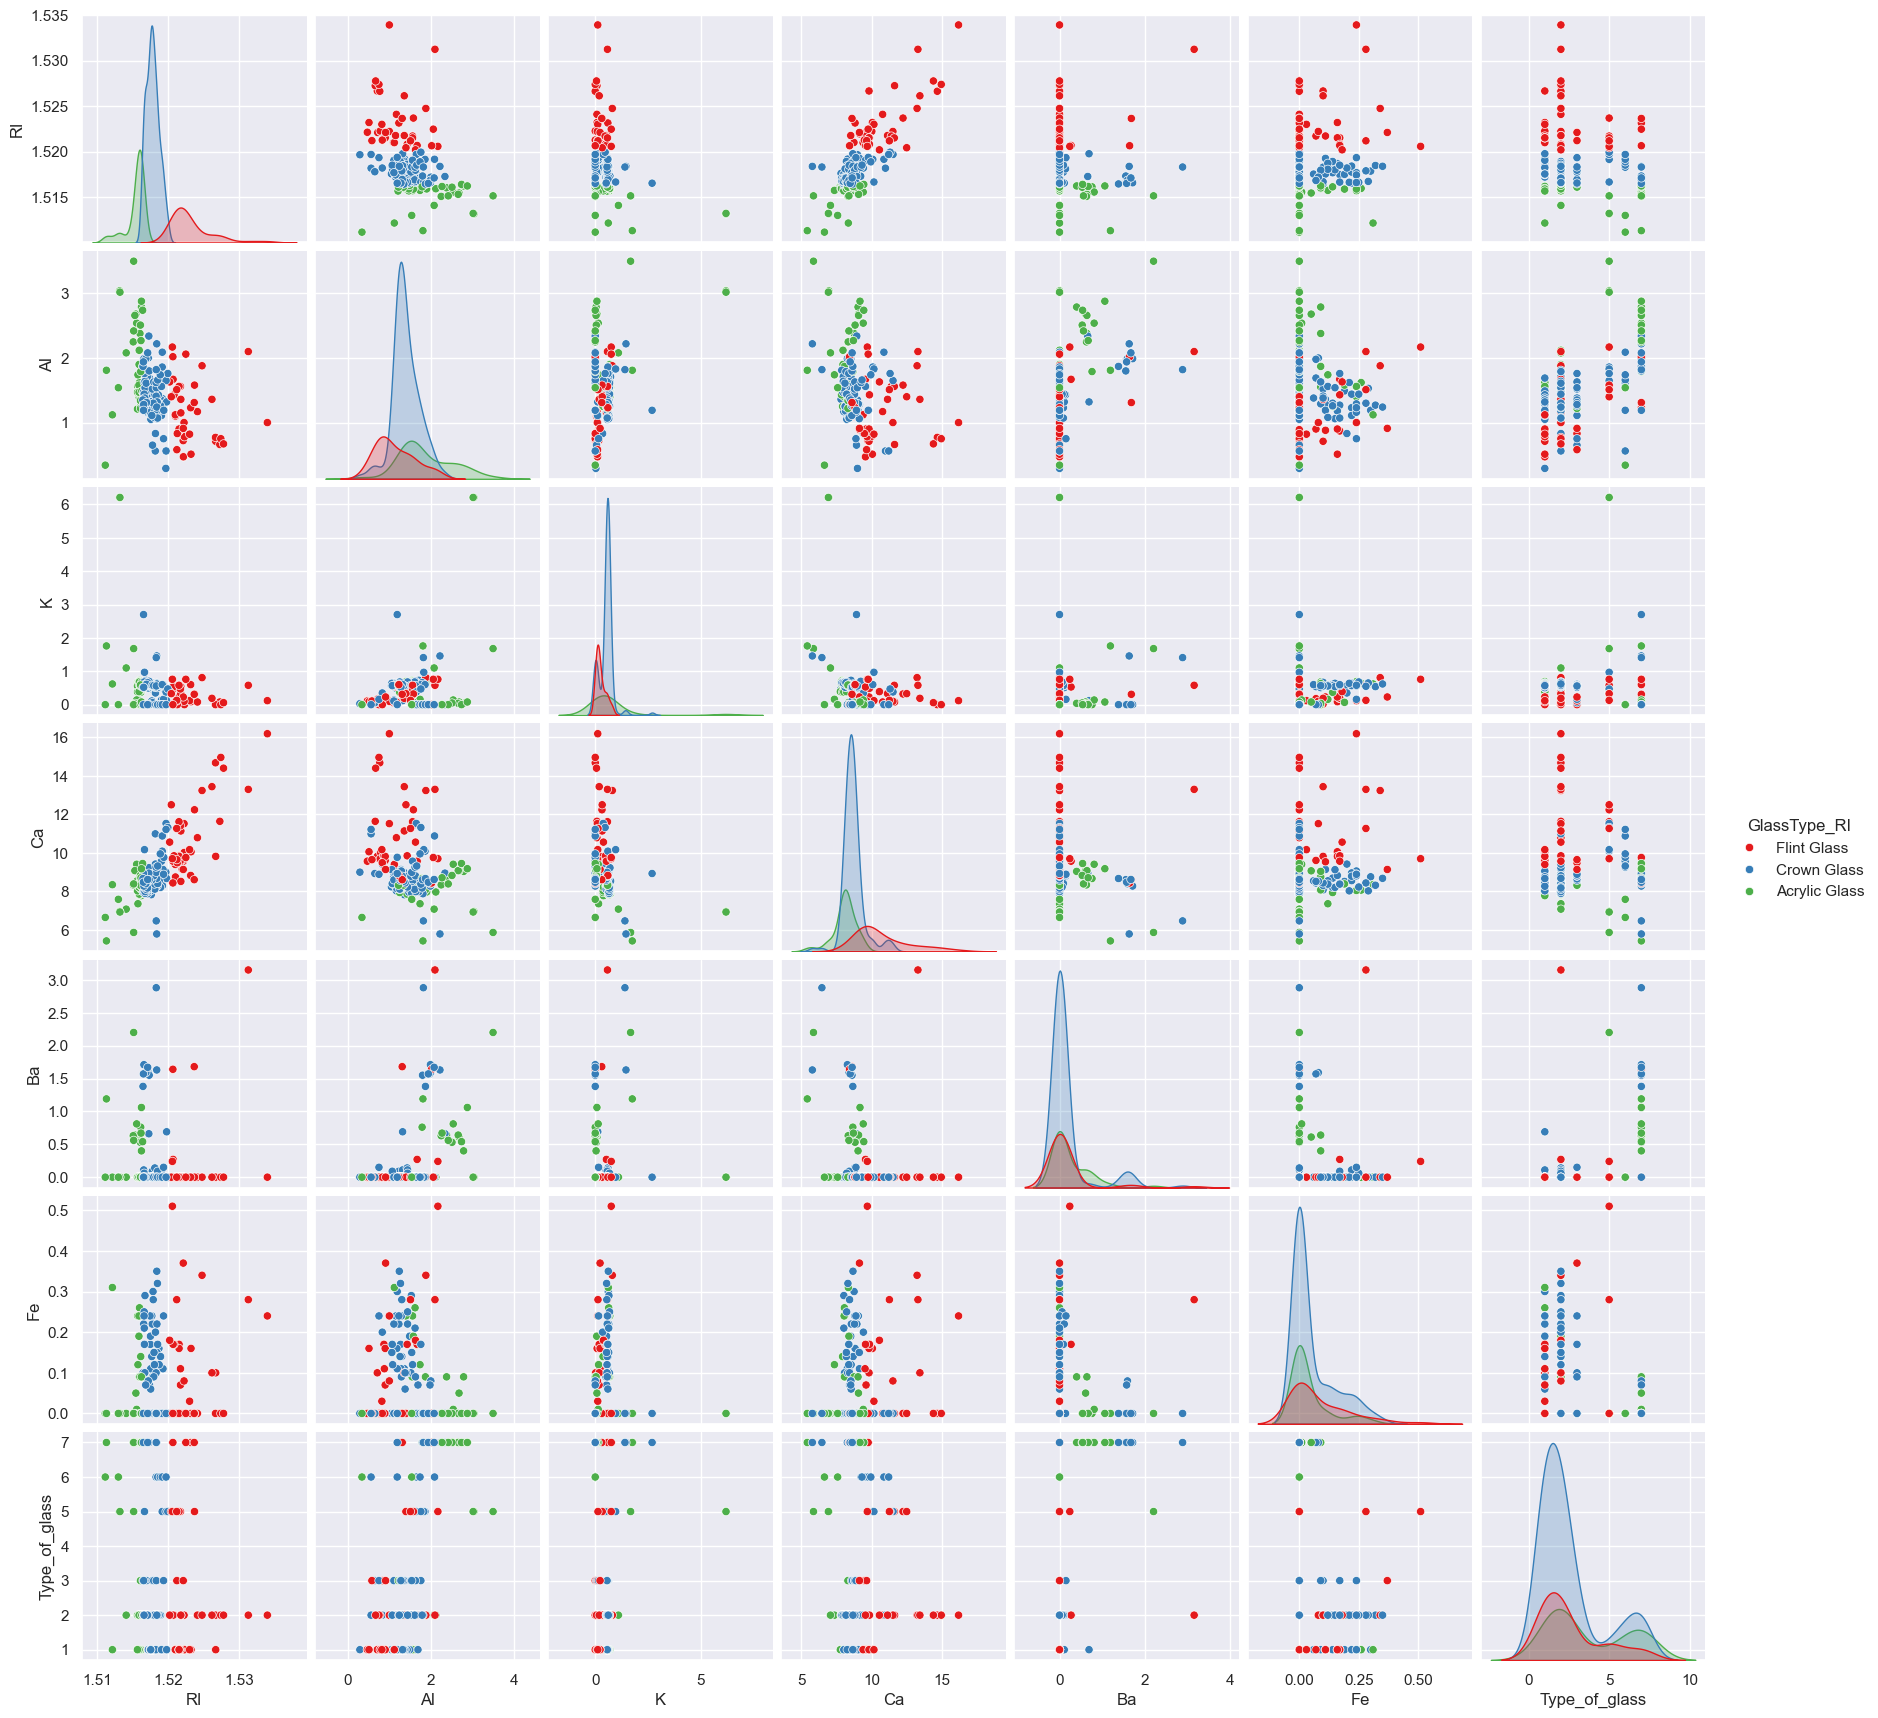

In [10]:
df_low_elmenents = glass_df.drop(columns=["Na", "Mg", "Si"])
display(df_low_elmenents.head())

sns.pairplot(df_low_elmenents, hue = "GlassType_RI", palette="Set1")
plt.show()
plt.close()

- From the low content elements pairplot I can see that the Calcium content can be related to the RI and Types of Glass since the scatterplot shows a linear relationship, low content Calcium glass has low RI and can be classified as Acrylic Glass.


### Machine Learning Models

#### Import libraries

In [11]:
# librrary to split the data
from sklearn.model_selection import train_test_split

# librrary to scale and normalize the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# library for pipeline
from sklearn.pipeline import Pipeline

# libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

# library for model tuning
from sklearn.model_selection import GridSearchCV

# library for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#### DecisionTreeClassifier

##### Prepare the data and test the model

The model performance is: 0.7906976744186046
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.88      0.50      0.64        14
           3       0.50      1.00      0.67         3
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.79        43
   macro avg       0.81      0.86      0.81        43
weighted avg       0.83      0.79      0.78        43



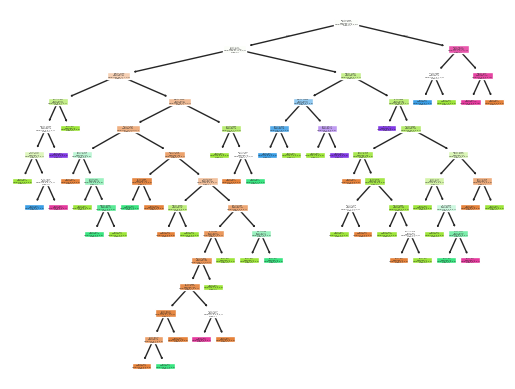

In [12]:
# Base Model 
dt = DecisionTreeClassifier(random_state=10)

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Classify the glass types using a decision tree
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(f'The model performance is: {dt.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))

# Plot the base tree model
feature_names = list(X)
tree.plot_tree(dt, feature_names = feature_names,  
               class_names = y["Type_of_glass"].unique().astype(str),
                filled=True)
plt.show()
plt.close()

- The base model has a score of 0.79 but the tree is over complicated
- It could be possible to optimize the tree by tuning the hyperparameters

##### Hyperparameter tuning

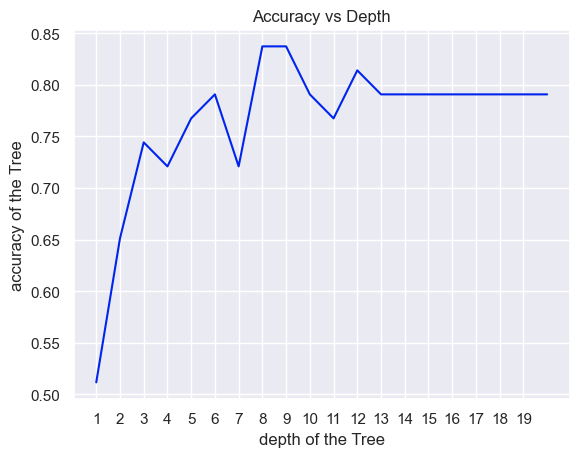

The best depth for the decision tree is 8 with a score of 0.8372093023255814


In [13]:
# hyperparameter tunning 

#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for items in depths:
  dtree = DecisionTreeClassifier(random_state=10,max_depth = items)
  dtree.fit(X_train,y_train)
  acc_depth.append(dtree.score(X_test,y_test))

#Plot the accuracy vs depth
sns.lineplot(x = depths, y = acc_depth)
plt.xlabel('depth of the Tree')
plt.ylabel('accuracy of the Tree')
plt.title('Accuracy vs Depth')
plt.xticks(range(1,20))
plt.show()
plt.close()

#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f"The best depth for the decision tree is {best_depth} with a score of {max_acc}")

- After tuning the tree depth the score is improved to 0.83 

#### Linear Regression

##### Prepare the data and test the model

The model performance is: 0.8557278202618007


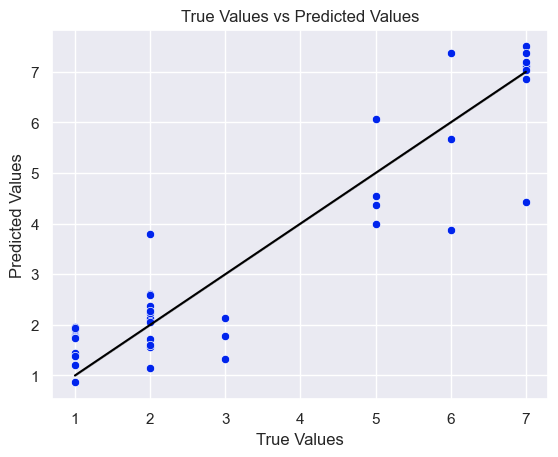

[[ 0.41067986  0.63244584 -0.94135388  0.60696226  0.3919384   0.10711275
  -0.31803813  0.1998126  -0.10065161]]
[2.64912281]


In [14]:
# Linear Regression Model
lr = LinearRegression()

# define the columns transformer as a touple ct([(x,y)])
ct = ColumnTransformer([("STD", StandardScaler(),["RI",	"Na", "Mg",	"Al", "Si", "K", "Ca", "Ba", "Fe"]),])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', ct), ('classifier', LinearRegression())])

# Classify the glass types using Linear Regression
pipeline.fit(X_train, y_train)

# Predict the results
y_pred = pipeline.predict(X_test)
                    
print(f'The model performance is: {pipeline.score(X_test, y_test)}')

# Convert the test and predicionn to 1d array for the plot
y_test_flat = y_test['Type_of_glass'].values # used for a Dataframe
y_pred_flat = y_pred.flatten() # use flatten for a numpy array

# Plot y_test vs y_pred
sns.scatterplot(x = y_test_flat, y = y_pred_flat)
sns.lineplot(x =y_test_flat, y = y_test_flat, color = "black")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

print(pipeline['classifier'].coef_)
print(pipeline['classifier'].intercept_)

- A linear regression model performs better than the decision tree base model 
- The features are standardized before the regression
- When plotting the predicted values vs the true test values, it is interesting to observe that no labels in the 4th catergory are present in the test set

#### Random Forest Regressor

##### Prepare the data and test the model

The model performance is: 0.8950916408348832


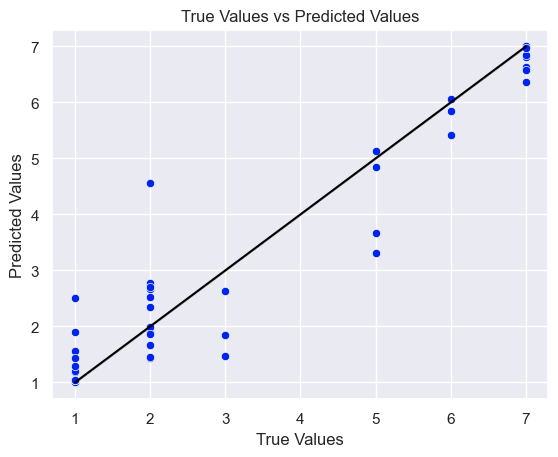

[0.07914722 0.07169259 0.44091394 0.1157729  0.02636923 0.02817559
 0.07756675 0.12494894 0.03541284]


In [15]:
# Linear Regression Model
rfr = RandomForestRegressor()

# Define the pipeline
pipeline_rfr = Pipeline(steps=[('preprocessor', ct), ('classifier', RandomForestRegressor())])

# Classify the glass types using Linear Regression
pipeline_rfr.fit(X_train, np.ravel(y_train))

# Predict the results
y_pred_rfr = pipeline_rfr.predict(X_test)
                    
print(f'The model performance is: {pipeline_rfr.score(X_test, y_test)}')

# Convert the test and predicionn to 1d array for the plot
y_test_flat_rfr = y_test['Type_of_glass'].values # used for a Dataframe
y_pred_flat_rfr = y_pred_rfr.flatten() # use flatten for a numpy array

# Plot y_test vs y_pred
sns.scatterplot(x = y_test_flat_rfr, y = y_pred_flat_rfr)
sns.lineplot(x =y_test_flat_rfr, y = y_test_flat_rfr, color = "black")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

print(pipeline_rfr['classifier'].feature_importances_)


##### Hyperparameter tuning

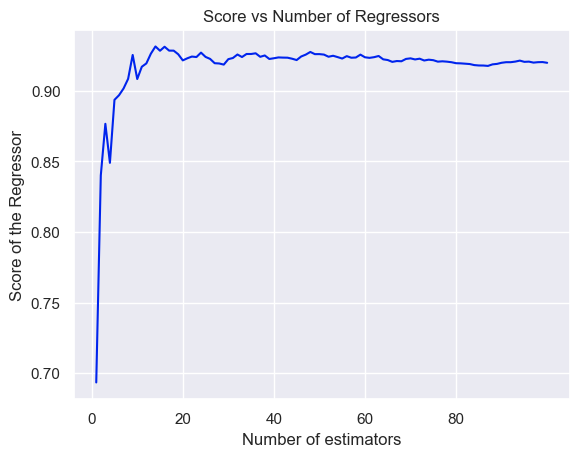

The best number of estimators for the random forest regressor is 14 with a score of 0.9313591524644576


In [16]:
# hyperparameter tunning 

#Fit a random forest regressor using n_estimators from 1 to 100 and plot the score vs number of estimators
estimators = range(1, 101)
score = []

for items in estimators:
  rfr = RandomForestRegressor(random_state = 10, n_estimators = items, criterion = "absolute_error")
  rfr.fit(X_train,np.ravel(y_train))
  score.append(rfr.score(X_test,y_test))

#Plot the accuracy vs depth
sns.lineplot(x = estimators, y = score)
plt.xlabel('Number of estimators')
plt.ylabel('Score of the Regressor')
plt.title('Score vs Number of Regressors')
plt.xticks(range(0,100, 20))
plt.show()
plt.close()

#Find the largest accuracy and the depth this occurs
max_acc = np.max(score)
best_score = estimators[np.argmax(score)]
print(f"The best number of estimators for the random forest regressor is {best_score} with a score of {max_acc}")

- The random forest model performs very weel even without hyperparameter tuning. a score of 0.93 is achieved by tuning the number of estimators. 
- It is also observed that not class 4 is observed in the test dataset

#### MLPRegressor

##### Prepare de data and train the model

The model performance is: 0.6180077228851348


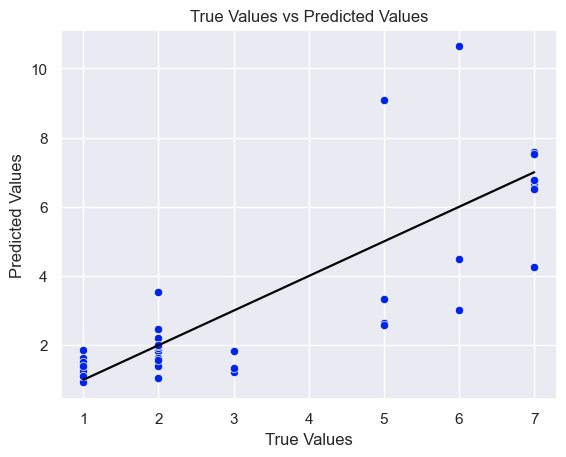

In [17]:
# MLP Model
mlpr = MLPRegressor(hidden_layer_sizes=[256, 128, 64, 32, 16], random_state= 69, early_stopping = True)

# Define the pipeline
pipeline_mlpr = Pipeline(steps=[('preprocessor', ct), ('classifier', mlpr)])

# Classify the glass types using Linear Regression
pipeline_mlpr.fit(X_train, np.ravel(y_train))

# Predict the results
y_pred_mlpr = pipeline_mlpr.predict(X_test)
                    
print(f'The model performance is: {pipeline_mlpr.score(X_test, y_test)}')

# Convert the test and predicionn to 1d array for the plot
y_test_flat_mlpr = y_test['Type_of_glass'].values # used for a Dataframe
y_pred_flat_mlpr = y_pred_mlpr.flatten() # use flatten for a numpy array

# Plot y_test vs y_pred
sns.scatterplot(x = y_test_flat_mlpr, y = y_pred_flat_mlpr)
sns.lineplot(x =y_test_flat_mlpr, y = y_test_flat_mlpr, color = "black")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

##### Hyperparameter tuning

In [18]:
#Setting up the grid search
parameters = {
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__max_iter': [100, 200, 300, 400, 500] 
}

grid_search = GridSearchCV(estimator = pipeline_mlpr, param_grid=parameters)
grid_search.fit(X_train, np.ravel(y_train))

c:\Users\cuate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\cuate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\cuate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\cuate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('STD',
                                                                         StandardScaler(),
                                                                         ['RI',
                                                                          'Na',
                                                                          'Mg',
                                                                          'Al',
                                                                          'Si',
                                                                          'K',
                                                                          'Ca',
                                                                          'Ba',
                                                                          'Fe'])])),
                                       ('classifier',
                                        MLPRegressor(early_stopping=True,
                                                     hidden_layer_sizes=[256,
                                                                         128,
                                                                         64, 32,
                                                                         16],
                                                     random_state=69))]),
             param_grid={'classifier__activation': ['tanh', 'relu'],
                         'classifier__max_iter': [100, 200, 300, 400, 500],
                         'classifier__solver': ['sgd', 'adam']})

In [19]:
# Best parameter set
print('Best parameters found:\n', grid_search.best_params_)

#Print the hyperparameter grid
hyperparameter_grid = pd.DataFrame(grid_search.cv_results_['params'])
grid_scores = pd.DataFrame(grid_search.cv_results_['mean_test_score'], columns = ['score'])
display(pd.concat([hyperparameter_grid, grid_scores], axis = 1))

# Predict the results with the best parameters
y_pred_mlpr_tuned = grid_search.predict(X_test)
print(f'The model performance with best parameters is: {grid_search.score(X_test, y_test)}')

Best parameters found:
 {'classifier__activation': 'tanh', 'classifier__max_iter': 200, 'classifier__solver': 'sgd'}


,classifier__activation,classifier__max_iter,classifier__solver,score
0,tanh,100,sgd,0.536341
1,tanh,100,adam,0.344893
2,tanh,200,sgd,0.545114
3,tanh,200,adam,0.344893
4,tanh,300,sgd,0.545114
5,tanh,300,adam,0.344893
6,tanh,400,sgd,0.545114
7,tanh,400,adam,0.344893
8,tanh,500,sgd,0.545114
9,tanh,500,adam,0.344893


The model performance with best parameters is: 0.7682784159459481


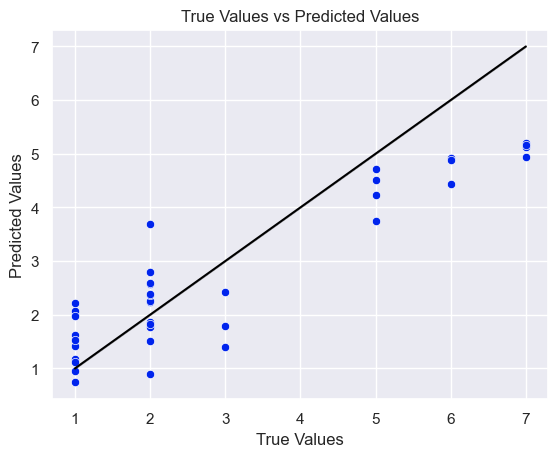

In [20]:
# Convert the test and predicionn to 1d array for the plot
y_test_flat_mlpr = y_test['Type_of_glass'].values # used for a Dataframe
y_pred_mlpr_tuned_flat = y_pred_mlpr_tuned.flatten() # use flatten for a numpy array

# Plot y_test vs y_pred
sns.scatterplot(x = y_test_flat_mlpr, y = y_pred_mlpr_tuned_flat)
sns.lineplot(x =y_test_flat_mlpr, y = y_test_flat_mlpr, color = "black")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

- The MLP Regressor worked with medium performance and after tuning the score increased to 0.76
- Comparing the results of all the models tested, the best option would be to use a random forest regressor. 